In [44]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [45]:
data = pd.read_csv('C:\\Users\\icosane\\Documents\\univ\\archive (2)\\apple_quality.csv')

#https://www.kaggle.com/datasets/zeesolver/apple-quality

In [46]:
target = []
for i in data['Quality']:
  if i == 'good':
    target.append(0)
  if i == 'bad':
    target.append(1)
data['Target'] = target

In [47]:
X = data.drop(columns=['A_id','Quality','Target'])
X19 = data.drop(columns=['A_id','Quality','Target'])
y = data['Target'].values
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [49]:
import tensorflow as tf 
from tensorflow import keras 

In [50]:
model = keras.Sequential([ 
    keras.layers.Dense(10, 
                       activation='sigmoid', kernel_initializer='glorot_uniform') 
]) 
model.compile( 
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']) 
  
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0) 

In [51]:
model.evaluate(X_test, y_test) 

25/25 [==============================] - 0s 959us/step - loss: 0.5238 - accuracy: 0.7500


[0.523786723613739, 0.75]

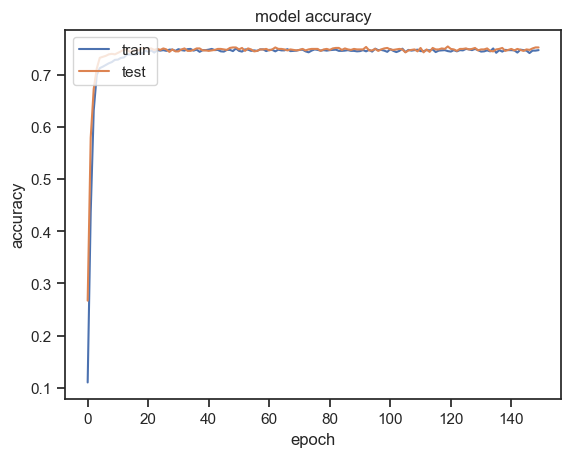

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


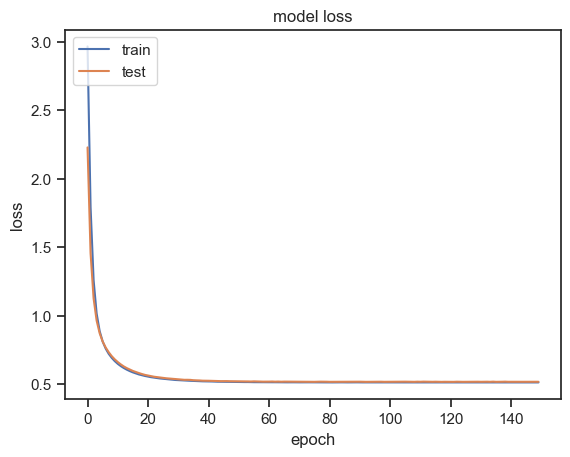

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
from gmdh import Mia

#https://stackoverflow.com/questions/77215054/cannot-import-name-regressor-from-gmdh

In [67]:
x_train, x_test, y_train, y_test = gmdh.split_data(X, y)
model = gmdh.Mia()
#model.fit(X_train, y_train)
y_pred = model.fit(x_train, y_train).predict(x_test[0], lags=800)
#print('MAE={}'.format(result))

In [68]:
y_pred

array([0.32073431, 0.25040328, 0.22082832, 0.32012322, 0.1946596 ,
       0.51789994, 0.23621469, 0.42267785, 0.39740224, 0.42734936,
       0.38834119, 0.42063578, 0.37774628, 0.40594038, 0.38538351,
       0.3929724 , 0.38629925, 0.39367472, 0.3884078 , 0.39402378,
       0.39062777, 0.39325478, 0.39175231, 0.39291701, 0.39174265,
       0.39252833, 0.39177919, 0.39224627, 0.39188339, 0.39213919,
       0.39195376, 0.39212925, 0.39201318, 0.39211587, 0.39204733,
       0.39209943, 0.39205895, 0.39208739, 0.39206181, 0.39207906,
       0.39206465, 0.39207491, 0.3920673 , 0.39207346, 0.39206916,
       0.39207286, 0.39207028, 0.39207234, 0.3920708 , 0.39207193,
       0.39207101, 0.39207165, 0.39207112, 0.3920715 , 0.39207121,
       0.39207144, 0.39207127, 0.39207141, 0.39207131, 0.39207139,
       0.39207133, 0.39207137, 0.39207134, 0.39207136, 0.39207134,
       0.39207136, 0.39207135, 0.39207135, 0.39207135, 0.39207135,
       0.39207135, 0.39207135, 0.39207135, 0.39207135, 0.39207

In [69]:
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

MAE=0.4991255646092481


In [74]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

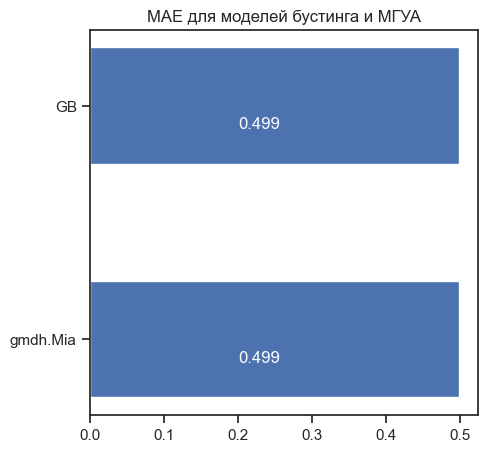

In [75]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)
y_pred_gb = model.predict(x_test)
result_gb = mean_absolute_error(y_test, y_pred)

array_labels2 = ['gmdh.Mia']
array_mae2 = [0.4991255646092481]

array_labels2 = array_labels2 + ['GB']
array_mae2 = array_mae2 + [result_gb]



vis_models_quality(array_mae2, array_labels2, 'MAE для моделей бустинга и МГУА')